# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

# Parse the JSON response
  
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | hadibu
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | san pedro pochutla
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | gobabis
Processing Record 10 of Set 1 | pevely
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | kourou
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | petropavlovsk-kamchatsky
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | viedma
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | port-aux-francais
Processing Rec

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,12.72,67,45,3.37,SH,1734225914
1,port mathurin,-19.6833,63.4167,25.38,74,41,7.97,MU,1734226125
2,hadibu,12.6500,54.0333,23.82,79,59,4.93,YE,1734226126
3,kingston,17.9970,-76.7936,22.34,85,0,2.00,JM,1734225499
4,san pedro pochutla,15.7333,-96.4667,31.84,84,100,1.51,MX,1734226128


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.72,67,45,3.37,SH,1734225914
1,port mathurin,-19.6833,63.4167,25.38,74,41,7.97,MU,1734226125
2,hadibu,12.6500,54.0333,23.82,79,59,4.93,YE,1734226126
3,kingston,17.9970,-76.7936,22.34,85,0,2.00,JM,1734225499
4,san pedro pochutla,15.7333,-96.4667,31.84,84,100,1.51,MX,1734226128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

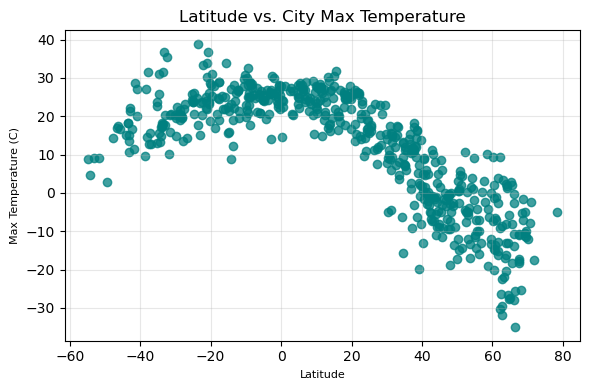

In [10]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.figure(figsize=(6, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="teal", alpha=0.75)

# Add title and labels
plt.title("Latitude vs. City Max Temperature")
plt.xlabel("Latitude", fontsize=8)
plt.ylabel("Max Temperature (C)", fontsize=8)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

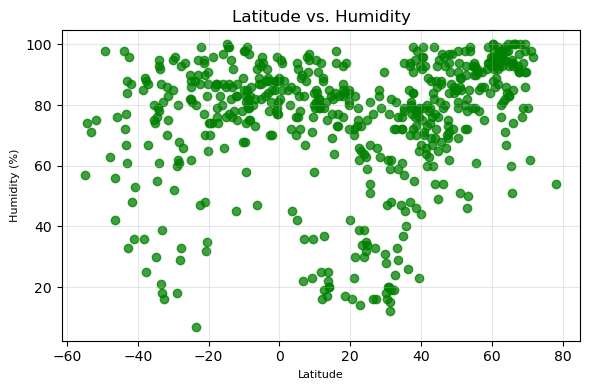

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure(figsize=(6, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="green", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude", fontsize=8)
plt.ylabel("Humidity (%)", fontsize=8)
plt.grid(alpha=0.3)

plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

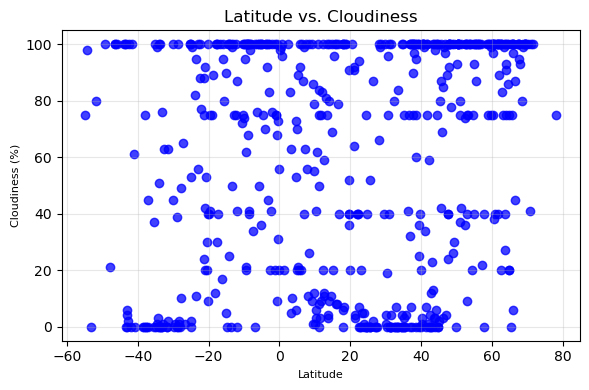

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="blue", alpha=0.75)

# Add title and labels
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude", fontsize=8)
plt.ylabel("Cloudiness (%)", fontsize=8)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

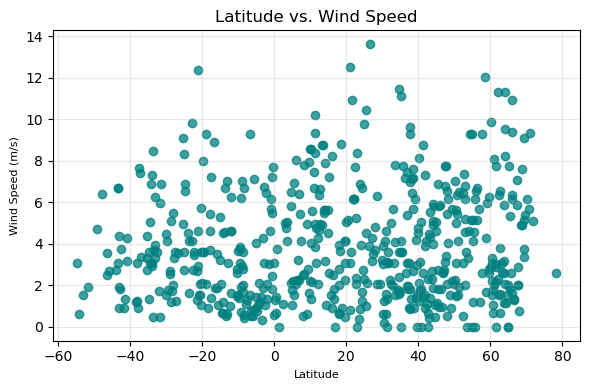

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="teal", alpha=0.75)

# Add title and labels
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude", fontsize=8)
plt.ylabel("Wind Speed (m/s)", fontsize=8)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.7511559293239435


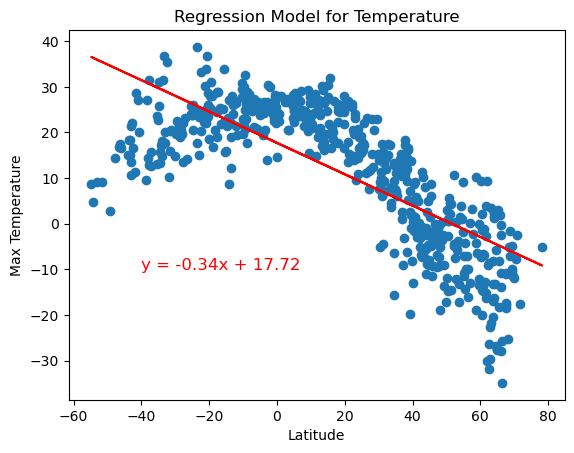

In [14]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
# Temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-10),fontsize=12,color="red")
plt.title('Regression Model for Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.15113823199536047


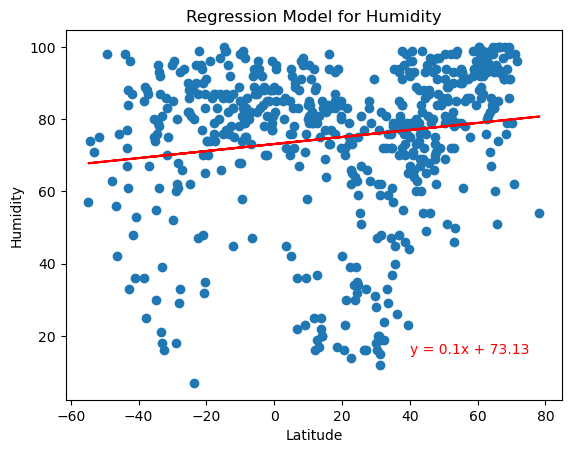

In [16]:
# Define a function to create Linear Regression plots
# Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=10,color="red")
plt.title('Regression Model for Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.17519645601821965


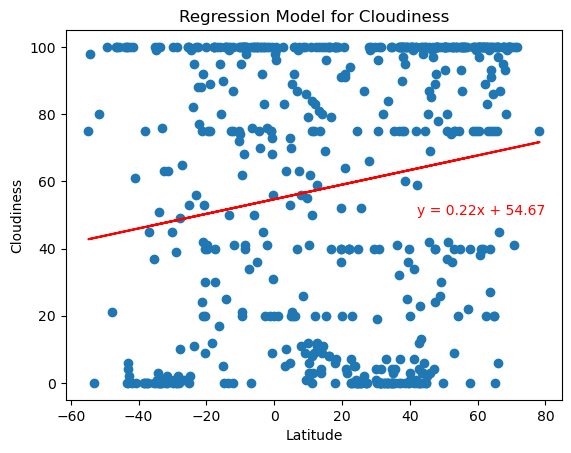

In [18]:
# Define a function to create Linear Regression plots
#Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,50),fontsize=10,color="red")
plt.title('Regression Model for Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.08434286928278904


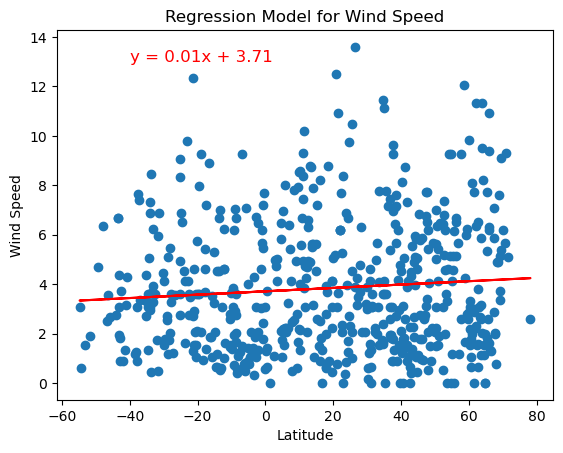

In [20]:
# Define a function to create Linear Regression plots
# Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,13),fontsize=12,color="red")
plt.title('Regression Model for Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hadibu,12.6500,54.0333,23.82,79,59,4.93,YE,1734226126
3,kingston,17.9970,-76.7936,22.34,85,0,2.00,JM,1734225499
4,san pedro pochutla,15.7333,-96.4667,31.84,84,100,1.51,MX,1734226128
6,olonkinbyen,70.9221,-8.7187,-2.49,98,100,9.31,SJ,1734226131
7,wailua homesteads,22.0669,-159.3780,25.63,79,40,6.17,US,1734226132


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,12.72,67,45,3.37,SH,1734225914
1,port mathurin,-19.6833,63.4167,25.38,74,41,7.97,MU,1734226125
5,puerto natales,-51.7236,-72.4875,9.17,75,80,1.90,CL,1734226129
8,gobabis,-22.4500,18.9667,23.77,47,100,2.74,NaN,1734226133
10,waitangi,-43.9535,-176.5597,15.00,98,100,2.75,NZ,1734226135


###  Temperature vs. Latitude Linear Regression Plot

The r²-value is: 0.756017846115923


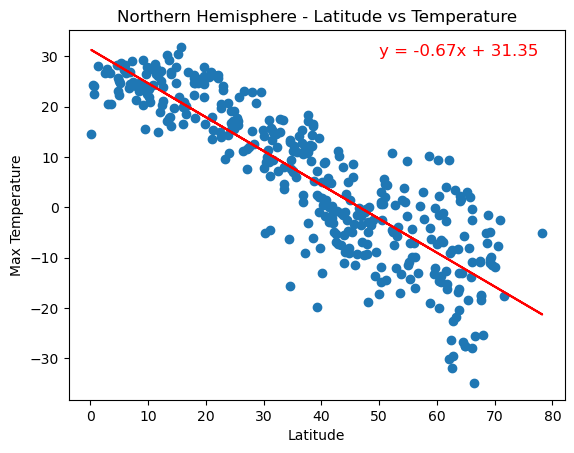

In [26]:
# Linear regression on Northern Hemisphere
# Temperature
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq, (50, 30),fontsize=12,color="red")
plt.title('Northern Hemisphere - Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r²-value is: {rvalue**2}")
plt.show()


The r²-value is: 0.2560639244455572


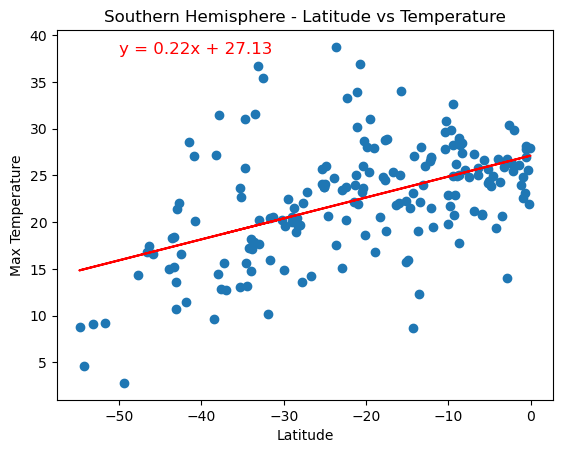

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(-50,38),fontsize=12,color="red")
plt.title('Southern Hemisphere - Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r²-value is: {rvalue**2}")
plt.show()

** In the northern hemisphere 75% of the the change in temperature can be attributed to latitude.  In the southern hemisphere 
only 25% of the changes in temperature can be attributed to latitude.

### Humidity vs. Latitude Linear Regression Plot

The r²-value is: 0.119159478349504


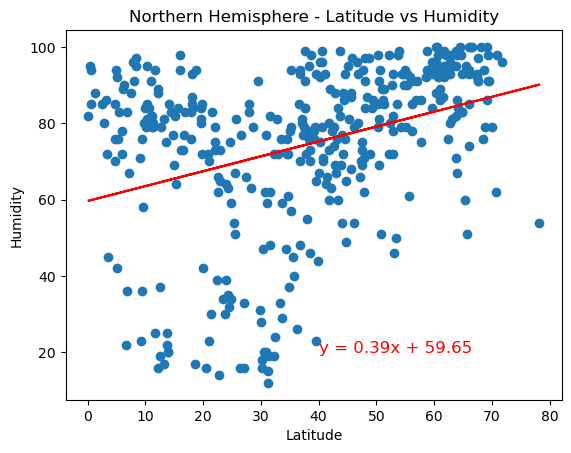

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(40,20),fontsize=12,color="red")
plt.title('Northern Hemisphere - Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r²-value is: {rvalue**2}")
plt.show()

The r²-value is: 0.10654544985987938


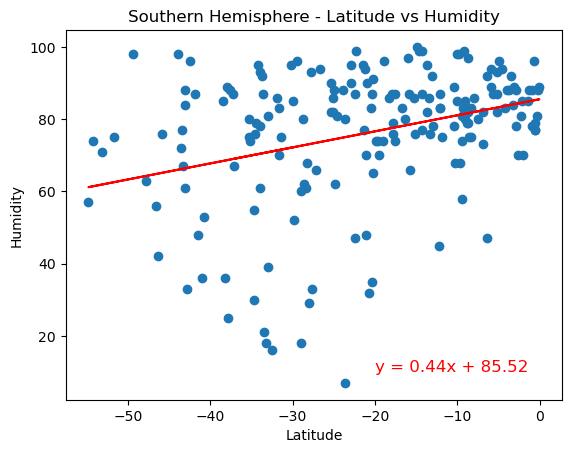

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(-20,10),fontsize=12,color="red")
plt.title('Southern Hemisphere - Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r²-value is: {rvalue**2}")
plt.show()

**Latitude has very little impact on humidity, with only 11% and 10% of changes in the northern and southern hemispheres respectively bing attributed to change in latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r²-value is: 0.090698785590362


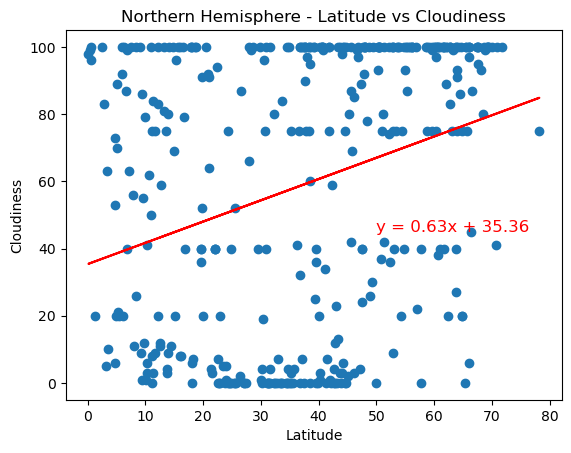

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(50,45),fontsize=12,color="red")
plt.title('Northern Hemisphere - Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r²-value is: {rvalue**2}")
plt.show()

The r²-value is: 0.07981547237042494


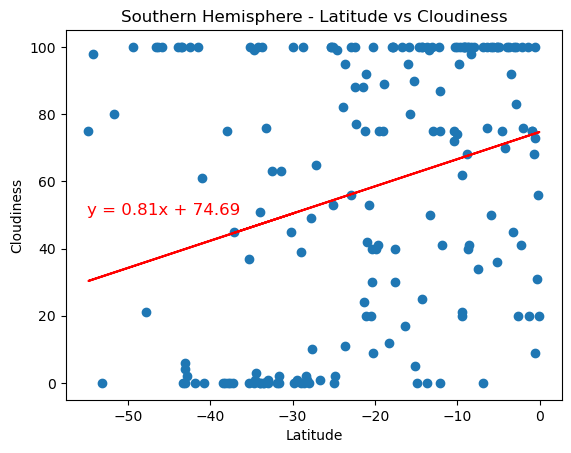

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(-55,50),fontsize=12,color="red")
plt.title('Southern Hemisphere - Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r²-value is: {rvalue**2}")
plt.show()

****Latitude has very little impact on Cloudiness, with less than 10% of changes in both hemispheres being attributed to change in latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r²-value is: 0.0004443527791388268


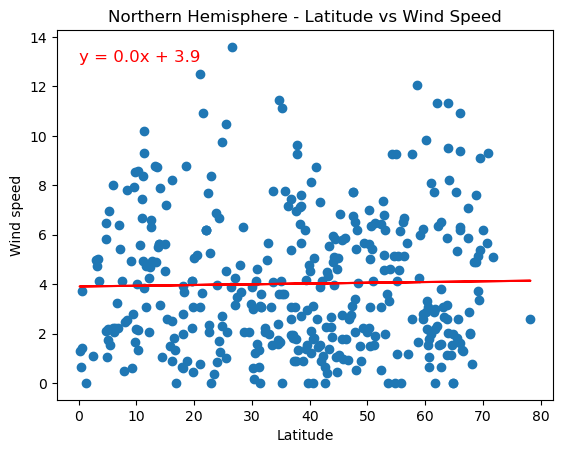

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(0,13),fontsize=12,color="red")
plt.title('Northern Hemisphere - Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r²-value is: {rvalue**2}")
plt.show()

The r²-value is: 0.00350774804548612


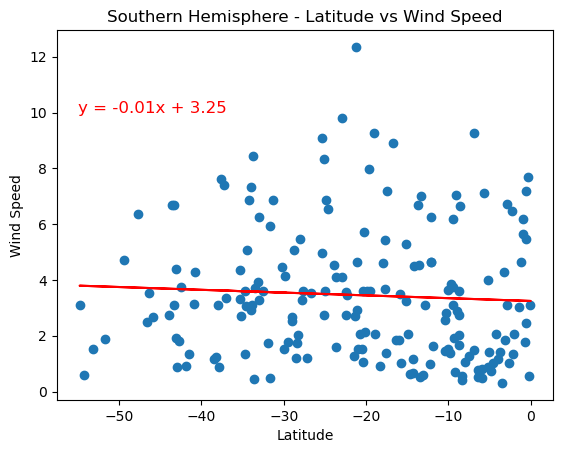

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-", label=f"r² = {round(rvalue**2, 2)}")
plt.annotate(line_eq,(-55,10),fontsize=12,color="red")
plt.title('Southern Hemisphere - Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r²-value is: {rvalue**2}")
plt.show()

**Almost no change in wind speed can beattributed to change in latitude.